In [192]:
#Import dependencies
%matplotlib notebook

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

import pandas as pd
import matplotlib.pyplot as plt
import numpy

import warnings
warnings.simplefilter('ignore')

In [147]:
#Read stats csv

df = pd.read_csv('nba_test_stats')
advance_df = pd.read_csv('nba_advance_stats')
full_df = pd.read_csv('full_stats')


In [148]:
#create feature lists

test_features = df[["teamAST", "teamTO", "teamSTL", "teamBLK", "teamPF", "teamFGA",
                        "team2PM", "team3PM","opptAST", "opptTO", "opptSTL", "opptBLK", "opptPF", "opptFGA", 
                        "oppt2PM", "oppt3PM"]]

full_features = full_df[["teamAST", "teamTO", "teamSTL", "teamBLK", "teamPF", "teamFGA",
                        "team2PM", "team3PM","opptAST", "opptTO", "opptSTL", "opptBLK", "opptPF", "opptFGA", 
                              'teamASST%', 'teamEFG%', 'teamAST/TO', 'teamTO%']]

top_7 = full_df[['teamEFG%','opptAST', 'teamAST/TO','teamAST', 'teamPF', 'opptPF', 'teamTO%']]

In [225]:
#encode binary classes for win/loss category

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

X = full_features
y = full_df['teamRslt']

label_encoder.fit(y)
y_encoded = label_encoder.transform(y)
y_encoded



array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [96]:
# from keras.utils import to_categorical

# one_hot_y = to_categorical(y_encoded)
# one_hot_y



In [97]:
#split test and train data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, random_state=42)

In [112]:
#create tree model and test accuracy

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7035230352303523

In [113]:
#random forest model, fit data, and score

rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.7937669376693767

In [109]:
#test column values
rf.predict(X_test)

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [110]:
#rate feature importances
importances = rf.feature_importances_
importances

array([0.05574478, 0.02534397, 0.03656996, 0.04169606, 0.05460816,
       0.03965028, 0.04599441, 0.03914606, 0.12502504, 0.04277007,
       0.033098  , 0.03126646, 0.05377598, 0.04027698, 0.04200819,
       0.18445066, 0.06207673, 0.0464982 ])

In [207]:
weighted_stat = sorted(zip(rf.feature_importances_, X), reverse=True)
weighted_stat

[(0.1809076949510327, 'teamEFG%'),
 (0.1255628901527734, 'opptAST'),
 (0.05770132575915558, 'teamAST/TO'),
 (0.057365062048969365, 'teamAST'),
 (0.05454333672480139, 'opptPF'),
 (0.05402218126888859, 'teamPF'),
 (0.04790336201521143, 'team2PM'),
 (0.04730444243229328, 'teamTO%'),
 (0.043219816580660125, 'teamASST%'),
 (0.042829232864354846, 'opptTO'),
 (0.04203191329888293, 'teamBLK'),
 (0.04086078791406513, 'team3PM'),
 (0.04067348830453344, 'opptFGA'),
 (0.03951786555171616, 'teamFGA'),
 (0.03648666837330443, 'teamSTL'),
 (0.03289609841028676, 'opptSTL'),
 (0.030942588865486287, 'opptBLK'),
 (0.02523124448358408, 'teamTO')]

In [198]:
weighted_df = pd.DataFrame(weighted_stat)
weight_label = weighted_df[0][0:7]
feature_label = weighted_df[1][0:7]

<IPython.core.display.Javascript object>


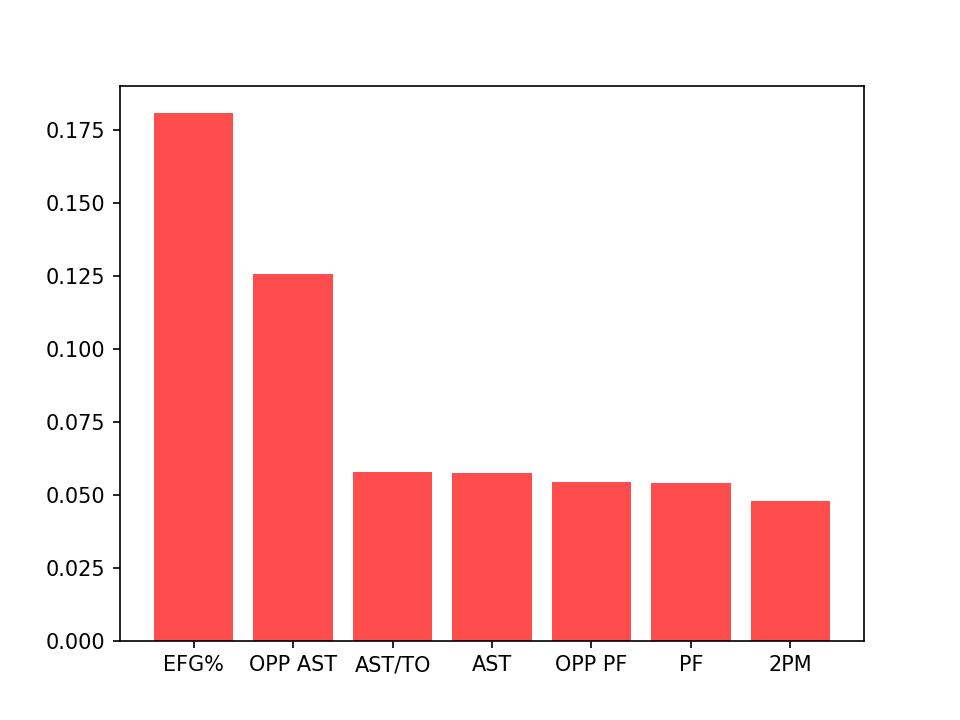

<BarContainer object of 7 artists>

In [204]:
plt.bar(feature_label, weight_label, width=0.8, color='r', alpha=0.7, align="center")

In [209]:
tick_locations = [value for value in feature_label]
plt.xticks(tick_locations, ["EFG%", "OPP AST", "AST/TO", "AST", "OPP PF", "PF", "2PM"])

([<matplotlib.axis.XTick at 0x1e306b75400>,
 <a list of 7 Text xticklabel objects>)

In [203]:
plt.xlim(-0.75, len(feature_label)-0.25)

(-0.75, 6.75)

In [115]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [212]:
logistic_train = classifier.score(X_train, y_train)
logistic_test = classifier.score(X_test, y_test)

In [213]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.815504156125768
Testing Data Score: 0.8132791327913279


In [218]:
pd.DataFrame({"Training Data Score": logistic_train, "Testing Data Score": logistic_test}, index = [0])

,Training Data Score,Testing Data Score
0,0.815504,0.813279


In [223]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

1


In [226]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["loss", "win"]))

             precision    recall  f1-score   support

       loss       0.81      0.81      0.81      1825
        win       0.81      0.82      0.82      1865

avg / total       0.81      0.81      0.81      3690



In [118]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

In [119]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [131]:
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [132]:
# first, create a normal neural network with 2 inputs, 6 hidden nodes, and 2 outputs
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=18))
model.add(Dense(units=2, activation='softmax'))

In [133]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 6)                 114       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 14        
Total params: 128
Trainable params: 128
Non-trainable params: 0
_________________________________________________________________


In [134]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [135]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)

Epoch 1/100
 - 90s - loss: 0.5075 - acc: 0.7512
Epoch 2/100
 - 1s - loss: 0.4402 - acc: 0.7913
Epoch 3/100
 - 1s - loss: 0.4227 - acc: 0.8008
Epoch 4/100
 - 1s - loss: 0.4148 - acc: 0.8064
Epoch 5/100
 - 1s - loss: 0.4098 - acc: 0.8064
Epoch 6/100
 - 1s - loss: 0.4062 - acc: 0.8076
Epoch 7/100
 - 1s - loss: 0.4037 - acc: 0.8101
Epoch 8/100
 - 1s - loss: 0.4020 - acc: 0.8108
Epoch 9/100
 - 0s - loss: 0.4004 - acc: 0.8104
Epoch 10/100
 - 0s - loss: 0.3998 - acc: 0.8121
Epoch 11/100
 - 0s - loss: 0.3989 - acc: 0.8107
Epoch 12/100
 - 0s - loss: 0.3986 - acc: 0.8126
Epoch 13/100
 - 0s - loss: 0.3981 - acc: 0.8119
Epoch 14/100
 - 0s - loss: 0.3978 - acc: 0.8112
Epoch 15/100
 - 0s - loss: 0.3976 - acc: 0.8122
Epoch 16/100
 - 0s - loss: 0.3973 - acc: 0.8135
Epoch 17/100
 - 0s - loss: 0.3970 - acc: 0.8130
Epoch 18/100
 - 0s - loss: 0.3966 - acc: 0.8134
Epoch 19/100
 - 1s - loss: 0.3964 - acc: 0.8116
Epoch 20/100
 - 1s - loss: 0.3961 - acc: 0.8146
Epoch 21/100
 - 0s - loss: 0.3961 - acc: 0.8132


In [139]:
deep_model = Sequential()
deep_model.add(Dense(units=6, activation='relu', input_dim=18))
deep_model.add(Dense(units=6, activation='relu'))
deep_model.add(Dense(units=2, activation='softmax'))

In [140]:
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 6)                 114       
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 42        
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 14        
Total params: 170
Trainable params: 170
Non-trainable params: 0
_________________________________________________________________


In [151]:
deep_model.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

metrics = deep_model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2
)



Epoch 1/100
 - 36s - loss: 0.3824 - acc: 0.8188
Epoch 2/100
 - 1s - loss: 0.3819 - acc: 0.8205
Epoch 3/100
 - 1s - loss: 0.3818 - acc: 0.8173
Epoch 4/100
 - 1s - loss: 0.3824 - acc: 0.8177
Epoch 5/100
 - 1s - loss: 0.3825 - acc: 0.8187
Epoch 6/100
 - 1s - loss: 0.3821 - acc: 0.8179
Epoch 7/100
 - 1s - loss: 0.3820 - acc: 0.8183
Epoch 8/100
 - 1s - loss: 0.3824 - acc: 0.8200
Epoch 9/100
 - 1s - loss: 0.3824 - acc: 0.8188
Epoch 10/100
 - 1s - loss: 0.3823 - acc: 0.8187
Epoch 11/100
 - 1s - loss: 0.3821 - acc: 0.8193
Epoch 12/100
 - 1s - loss: 0.3823 - acc: 0.8195
Epoch 13/100
 - 1s - loss: 0.3819 - acc: 0.8189
Epoch 14/100
 - 1s - loss: 0.3824 - acc: 0.8186
Epoch 15/100
 - 1s - loss: 0.3823 - acc: 0.8181
Epoch 16/100
 - 1s - loss: 0.3824 - acc: 0.8202
Epoch 17/100
 - 1s - loss: 0.3823 - acc: 0.8199
Epoch 18/100
 - 1s - loss: 0.3820 - acc: 0.8191
Epoch 19/100
 - 1s - loss: 0.3822 - acc: 0.8191
Epoch 20/100
 - 1s - loss: 0.3824 - acc: 0.8185
Epoch 21/100
 - 1s - loss: 0.3824 - acc: 0.8178


In [157]:
print(metrics.history.keys())

dict_keys(['loss', 'acc'])


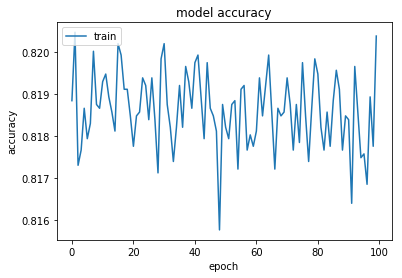

In [159]:
plt.plot(metrics.history['acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# plt.plot(metrics.history['loss'])
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()